# <center><font face=' bold'> Uber Data Analysis </font></center>

## Content

- Geography- USA, Sri lanka and pakistan.
- Time period - jan - dec 2016.
- Unit of analysis- Drives.
- Total drives: 1155, total miles- 12,204.

The dataset contains start date, end date, start location, end location, miles driven, and the purpose of drive(business,personal,meals,meetings)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.shape

(1156, 7)

In [6]:
df.columns = df.columns.str.replace("*","")

In [7]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
df['START']

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1151             Kar?chi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
1155                 NaN
Name: START, Length: 1156, dtype: object

In [9]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


- so the last row of the five columns is missing

In [10]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
df.isnull().sum()       # checking for missing values

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

#### Plotting heatmap

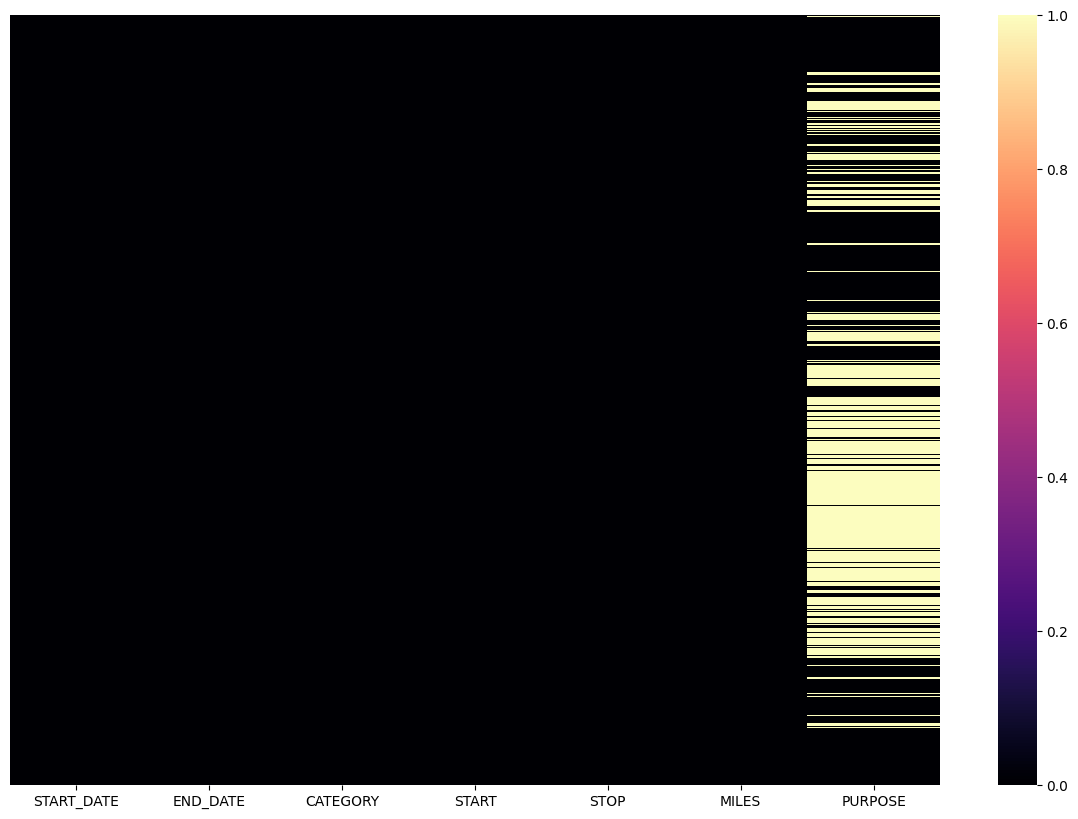

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [13]:
null_columns = df.columns[df.isnull().any()]   # Showing the null columns in the dataset

print(null_columns)

Index(['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')


In [14]:
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

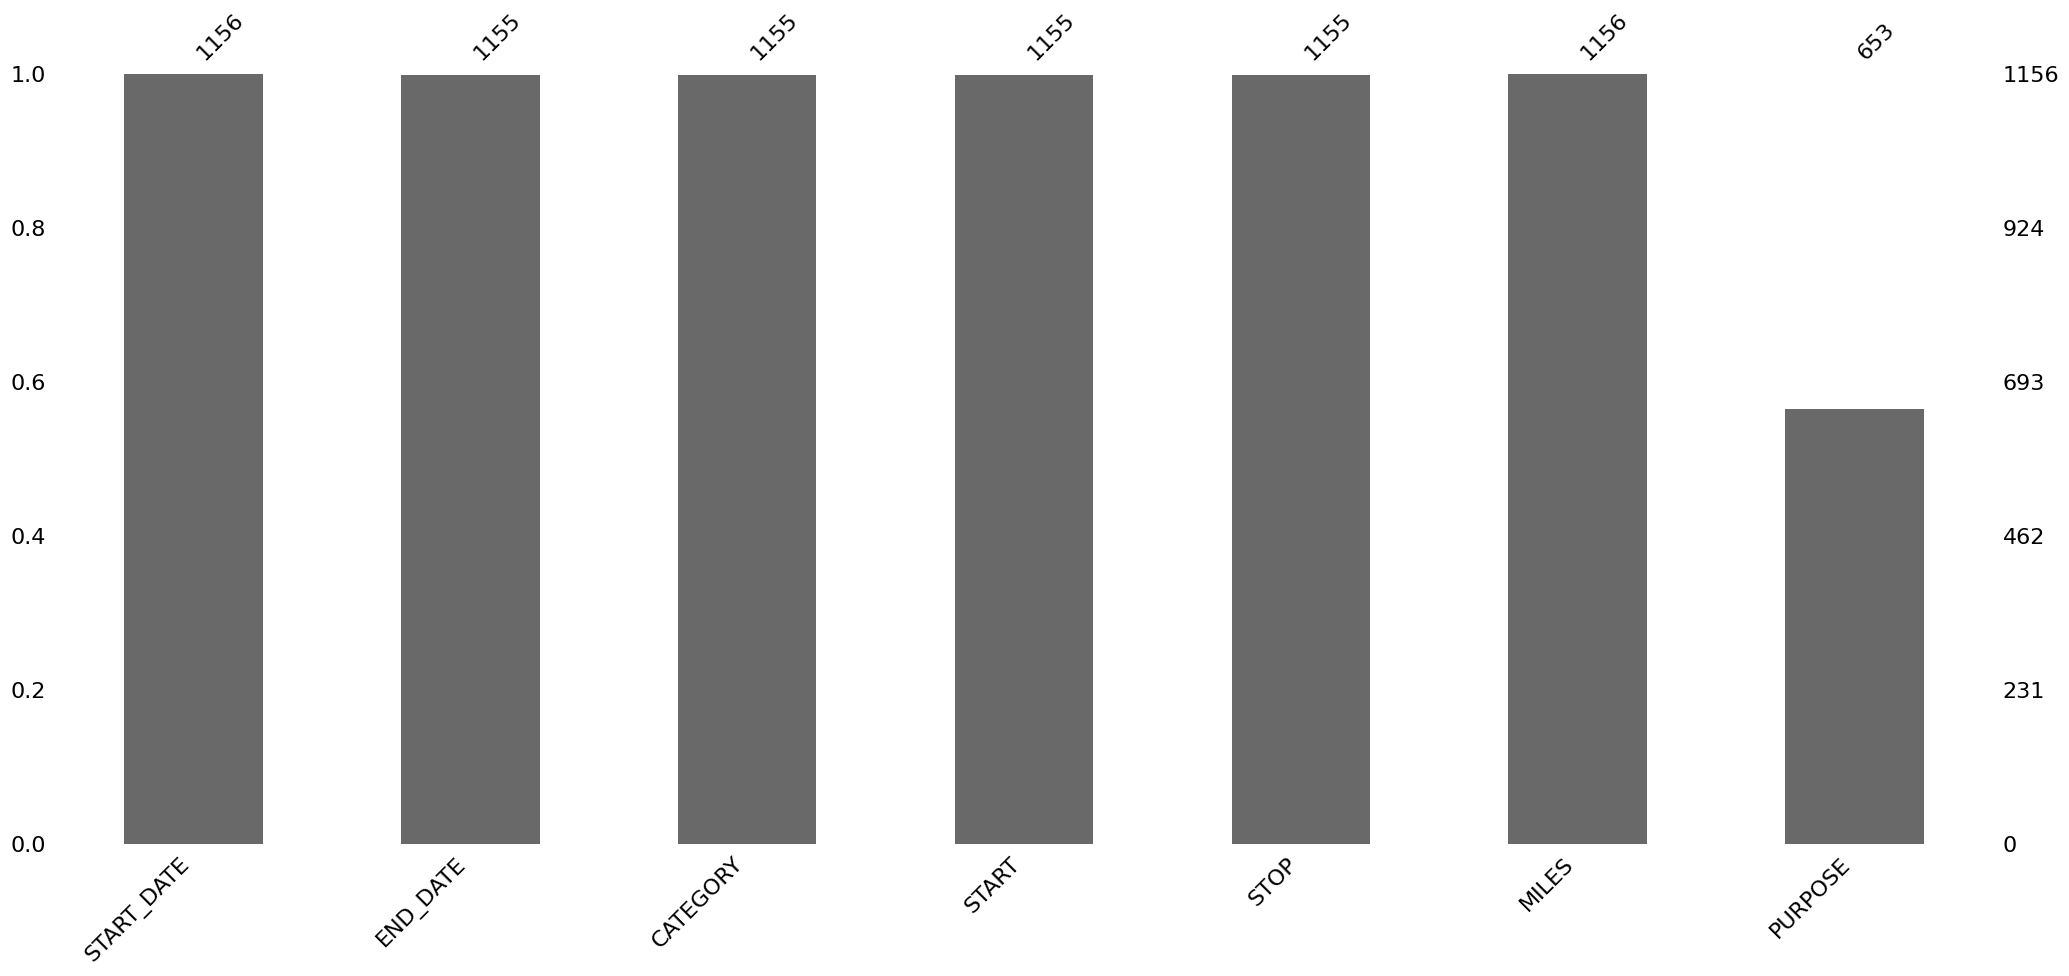

In [15]:
import missingno as msno          # This plot shows that where are the missing values are
msno.bar(df)
plt.show()

In [16]:
df.drop(index=1155,axis=0,inplace=True) 

- Dropping the last row of the dataset because of the missing values in five columns

- So in the data, the problem with those four columns that have missing values is solved now

In [17]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

- Now we have to deal with the other 502 missing values of the cfolumn named 'Purpose'

- We didn't drop the 'Purpose' column because our dataset is small

In [18]:
per = df['PURPOSE'].isnull().sum()/len(df)
print('Percentage of the missing values in the column Purpose:', per*100)

Percentage of the missing values in the column Purpose: 43.46320346320346


#### Fill the missing values with the method of Forward Fill.

In [19]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [20]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [21]:
# Converting Start Date and End Date from Object Datatype to Date-Time Datatype
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [22]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


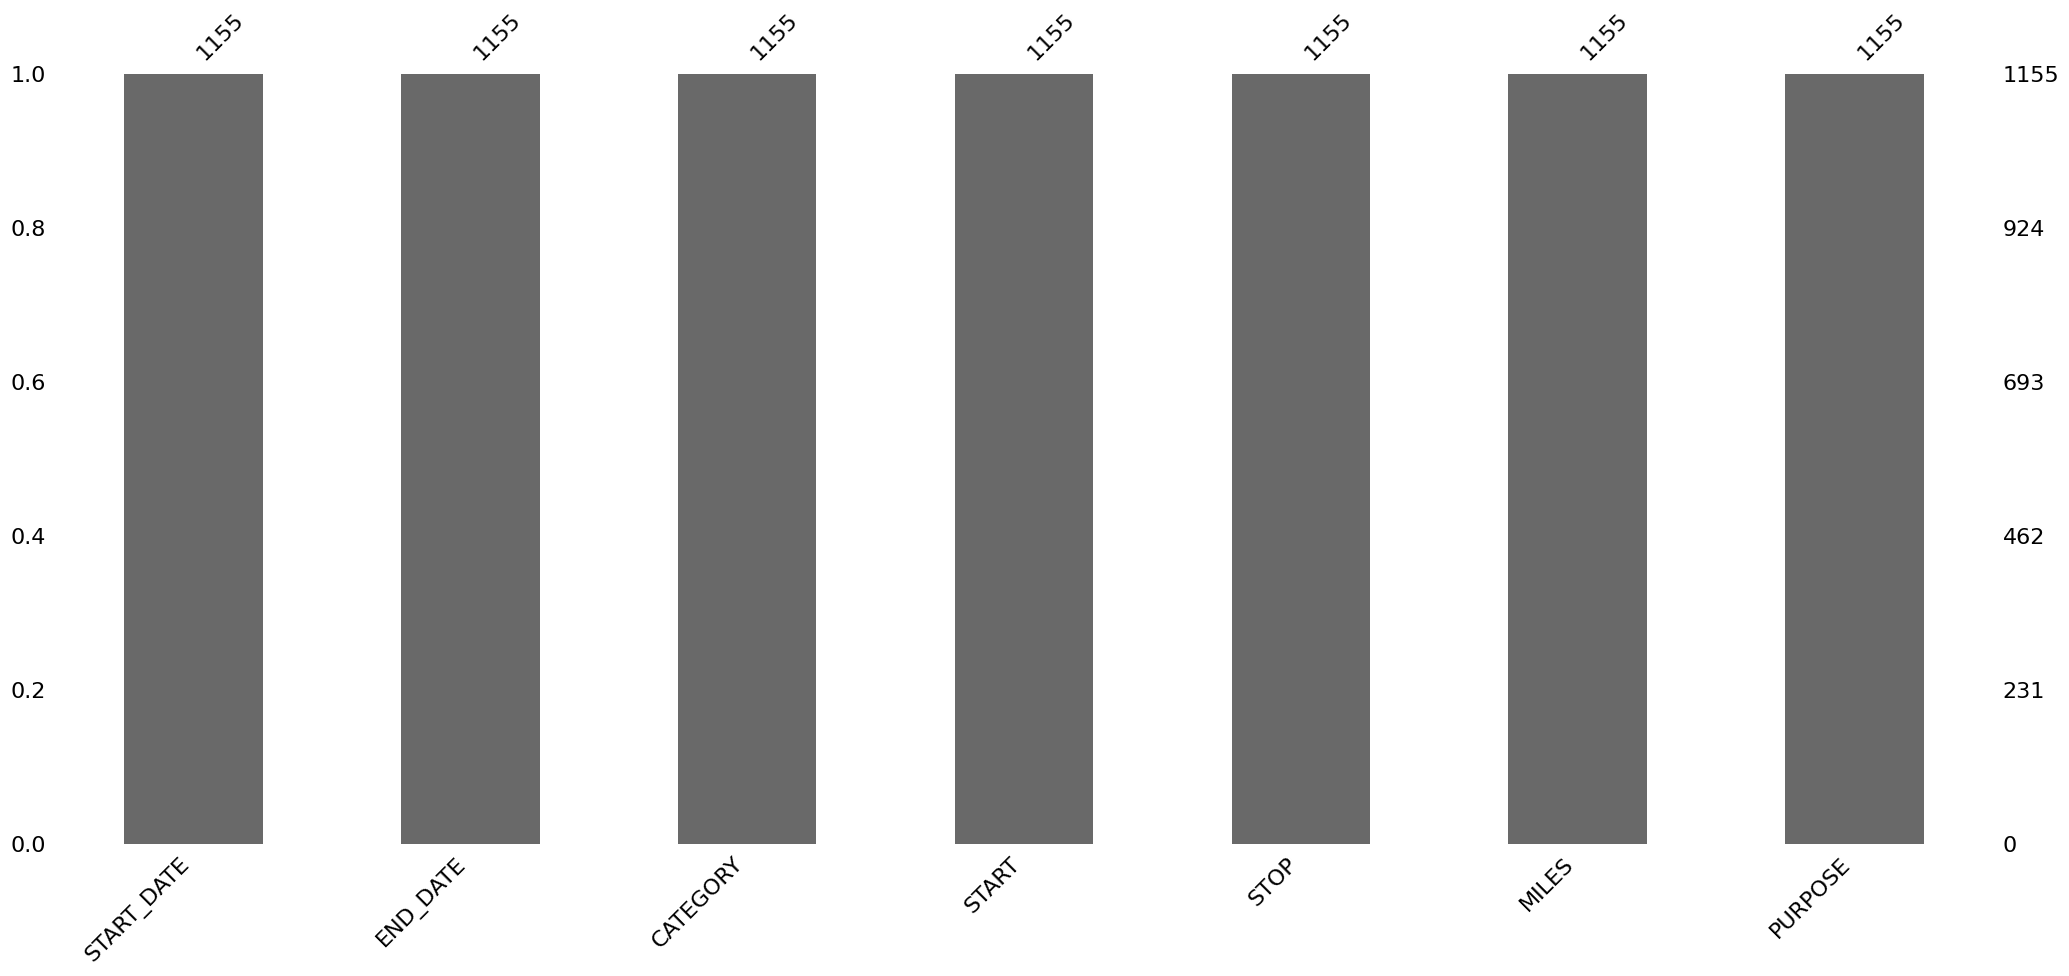

In [23]:
# Showing there is no missing values
msno.bar(df)
plt.show()

In [24]:
category = pd.crosstab(index = df['CATEGORY'],columns = 'count of travel per category')

category

col_0,count of travel per category
CATEGORY,
Business,1078
Personal,77


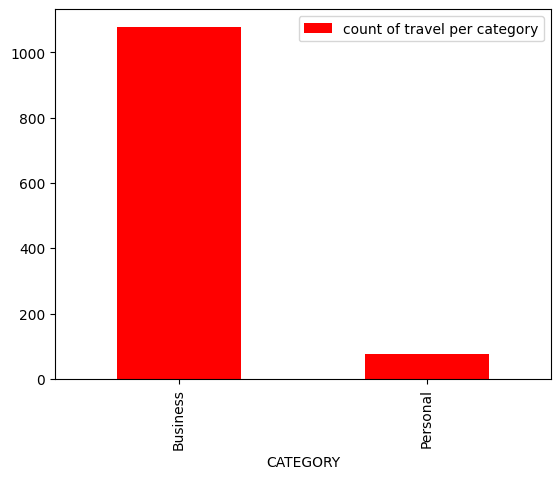

In [25]:
category.plot(kind = 'bar',color='r')
plt.legend()

#### Finding out the most 10 frequent start locations
Locations that are the start location more than 10 number of times

In [26]:
start_point = df.START.value_counts()

start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [27]:
start_point[start_point>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

- Pie chart of the locations

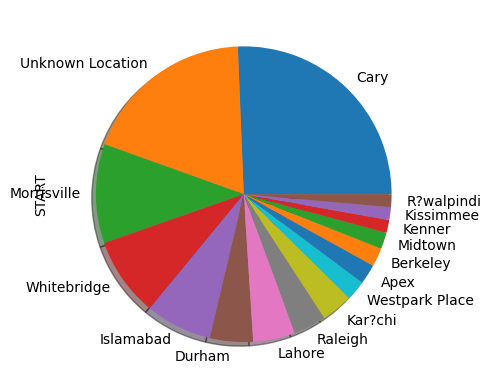

In [28]:
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

##### 'Cary' is the start location for the majority of the times.

In [29]:
start_point[start_point<=10]   

New Orleans       10
Emeryville        10
Downtown           9
Edgehill Farms     8
Central            8
                  ..
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: START, Length: 161, dtype: int64

#### Some Analysis for 'Miles'

In [30]:
miles = df.MILES.value_counts()

miles

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 256, dtype: int64

In [31]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

<AxesSubplot: >

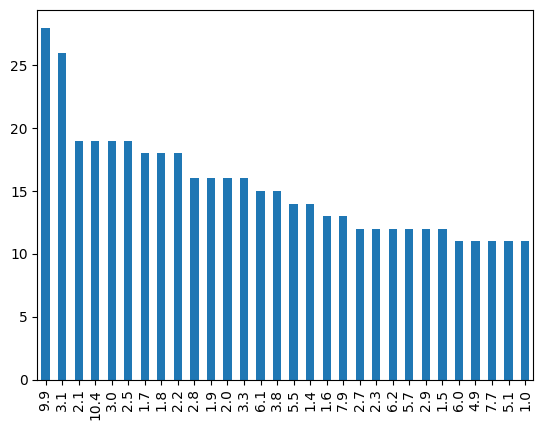

In [32]:
miles[miles>10].plot(kind='bar')

#### So majority of the trips are very short trips

In [33]:
miles[miles<=10]

8.4     10
8.7     10
3.9     10
3.6     10
5.3     10
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 226, dtype: int64

col_0  count of miles
MILES                
False             840
True              315


<AxesSubplot: xlabel='MILES'>

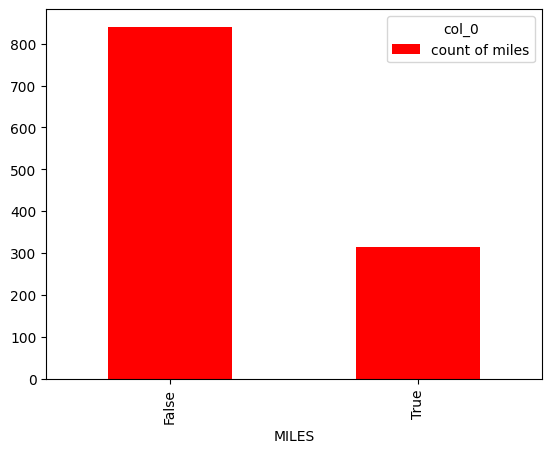

In [34]:
miles = pd.crosstab(index=df['MILES']>10,columns='count of miles')
print(miles)

miles.plot(kind='bar',color='r')


In [35]:
df.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

##### So for the meeting purpose, The trips are most.

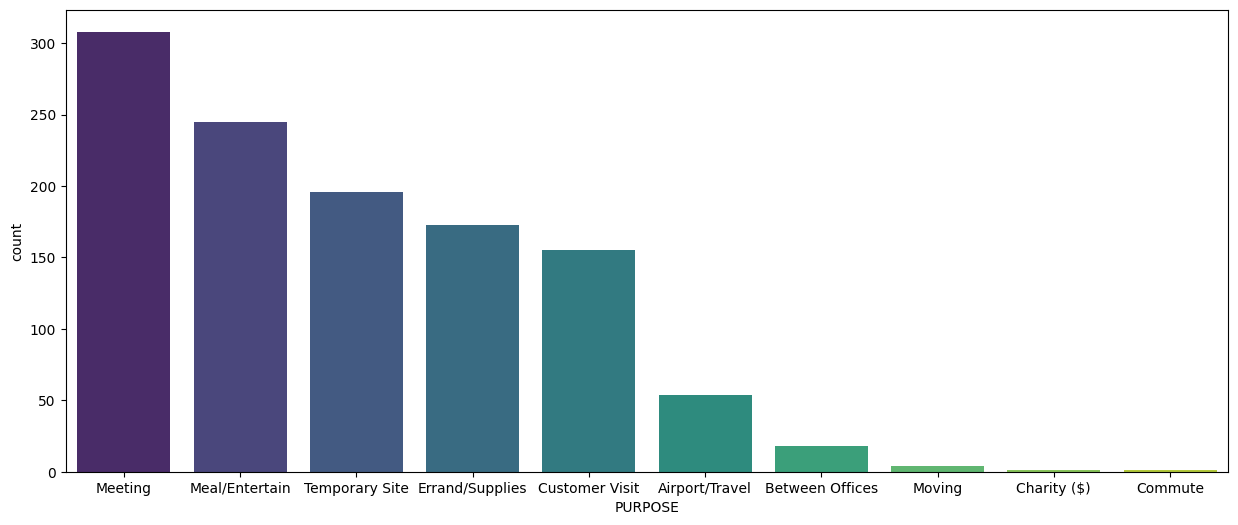

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['PURPOSE'],order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

### Lets calculate the duration, as there might be some relation of it with purpose of ride

In [37]:
df['minutes'] = df.END_DATE-df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [38]:
df['minutes'] = df['minutes'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


##### Grouping purpose by miles to see if we can get any pattern

In [39]:
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
              'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Max': df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,14.953704,0.9,156.9
1,Between Offices,10.944444,1.9,39.2
2,Charity ($),15.100000,15.1,15.1
3,Commute,180.200000,180.2,180.2
4,Customer Visit,16.065806,0.6,310.3
5,Errand/Supplies,5.928902,0.5,195.3
6,Meal/Entertain,5.773878,0.6,36.5
7,Meeting,12.652597,0.7,201.0
8,Moving,4.550000,3.3,6.1
9,Temporary Site,11.016327,0.7,195.6


- Box plot of miles and minutes

- Plot with outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

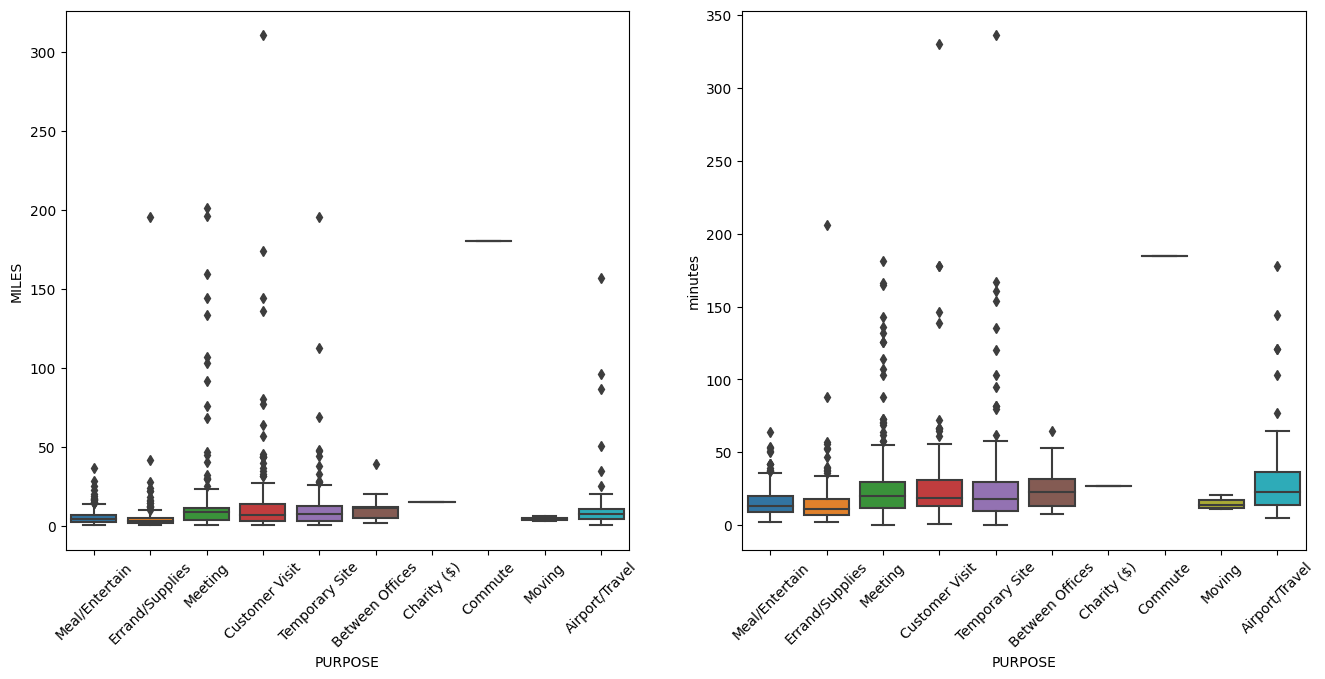

In [40]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

- Plot without outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

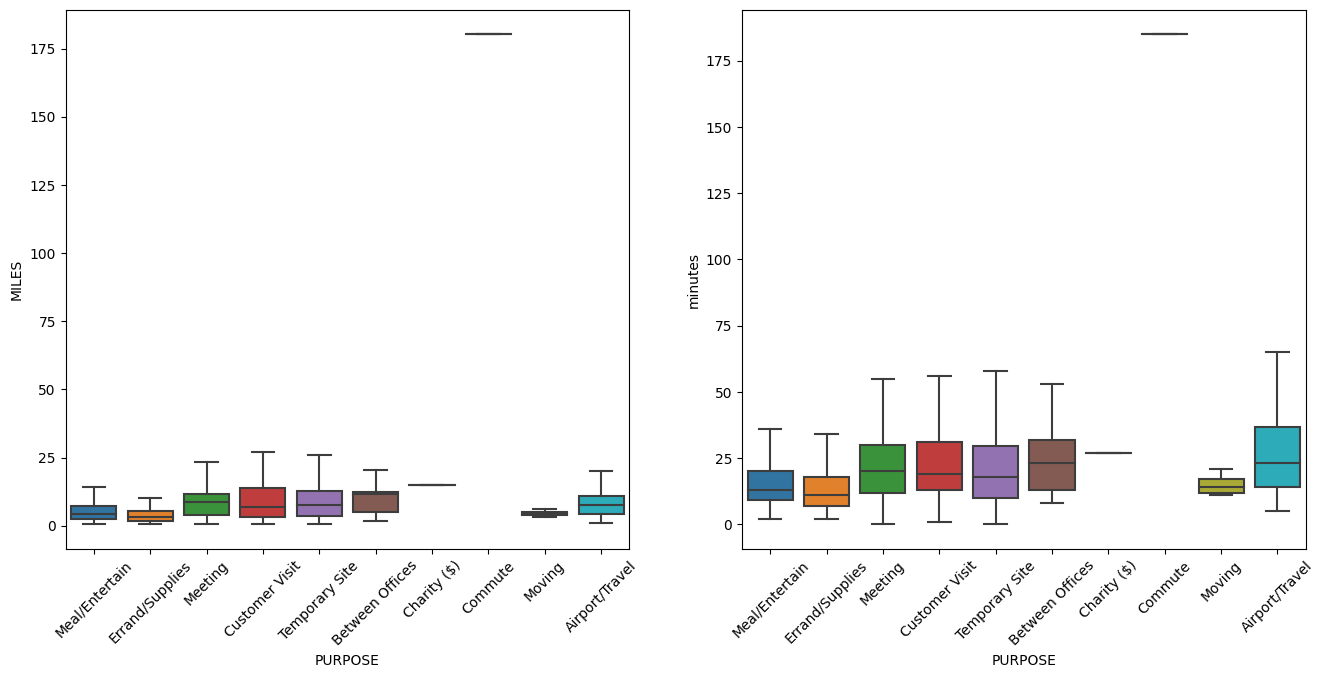

In [41]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers=False)
plt.xticks(rotation=45)

##### Chcking how many are the round trips .i.e. start and stop points are same

In [42]:
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['Roundtrip'] = df.apply(round, axis=1)

In [43]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


- Count plot that shows that how many roundtrip happend

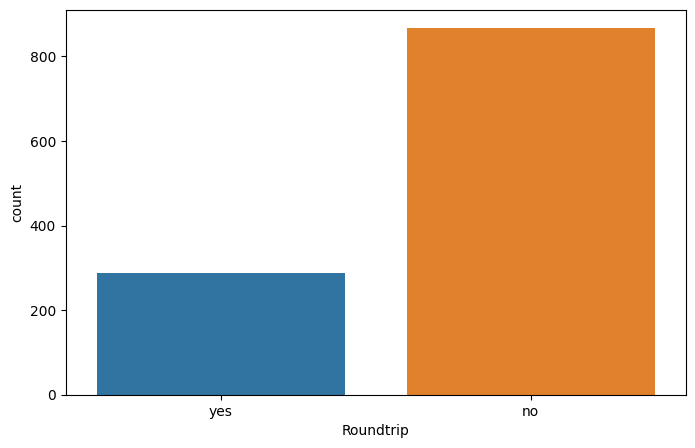

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Roundtrip'])
plt.show()

##### Entering month name and evaluating frequency of trip in each month

In [45]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [46]:
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['month']=df['month'].map(dic)

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan


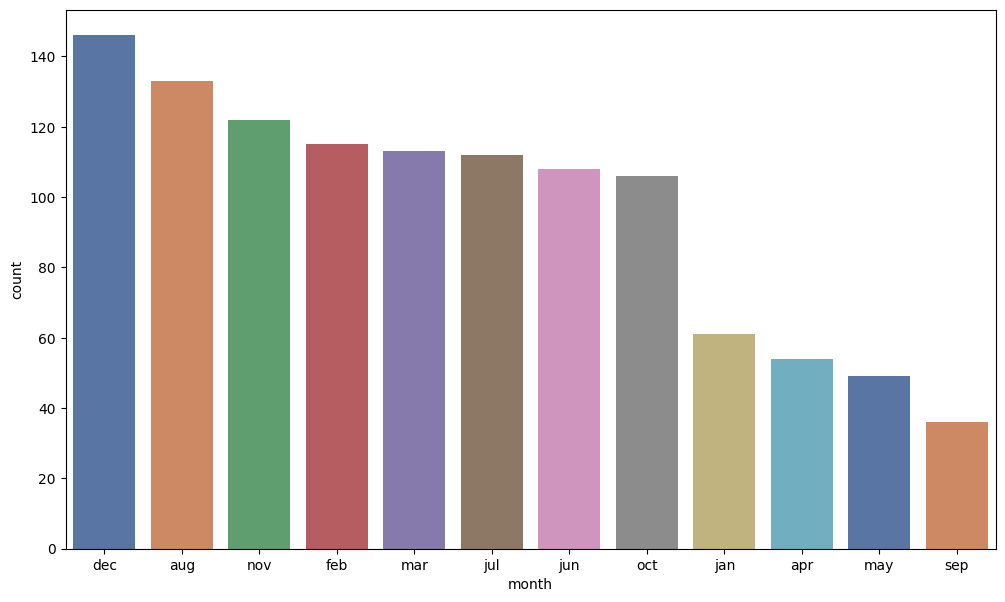

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['month'],order=df['month'].value_counts().index,palette='deep')
plt.show()

###### So in December there were the highest number of trips happened

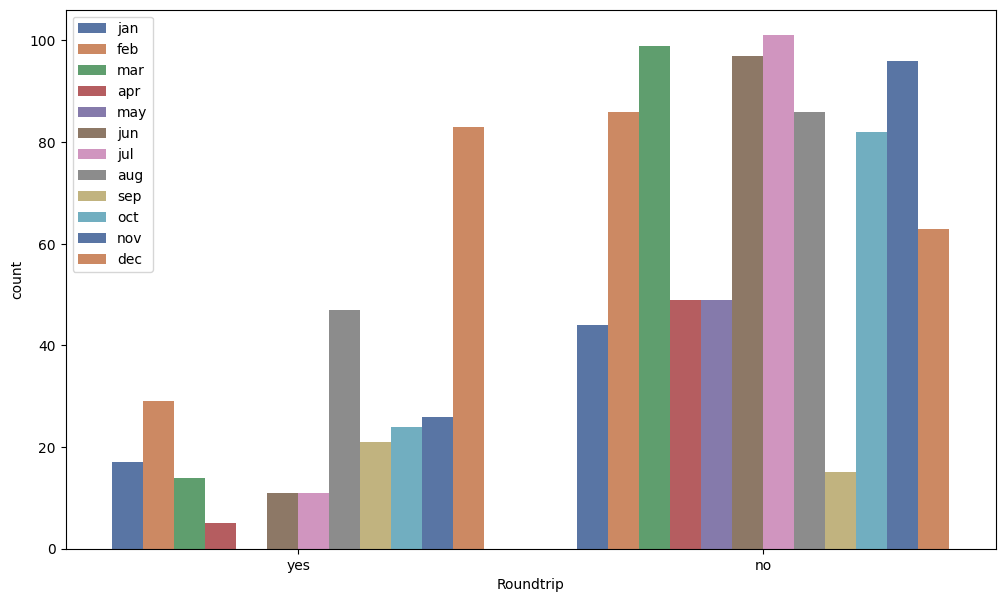

In [48]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['Roundtrip'],hue=df['month'],palette ='deep')
plt.legend()

##### Also in December there were the highest number of roundtrips

<AxesSubplot: xlabel='minutes', ylabel='MILES'>

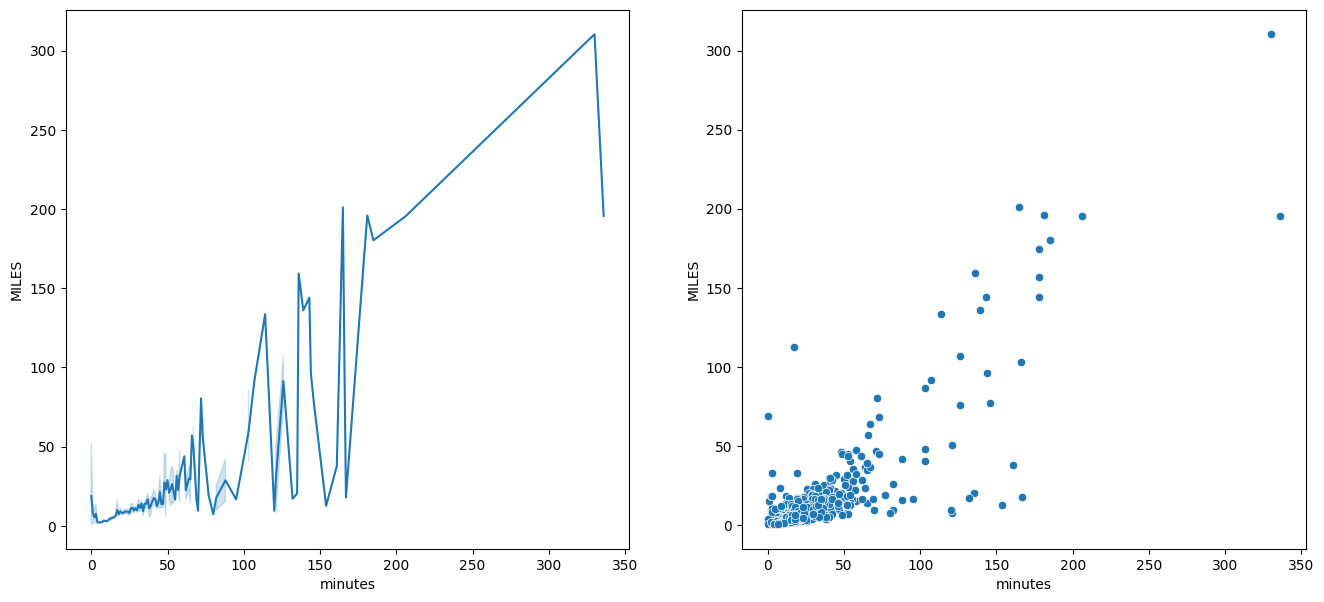

In [49]:
# lineplot and Scatterplot

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minutes,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minutes,y=df.MILES)

### Distribution of Cab rides based on category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

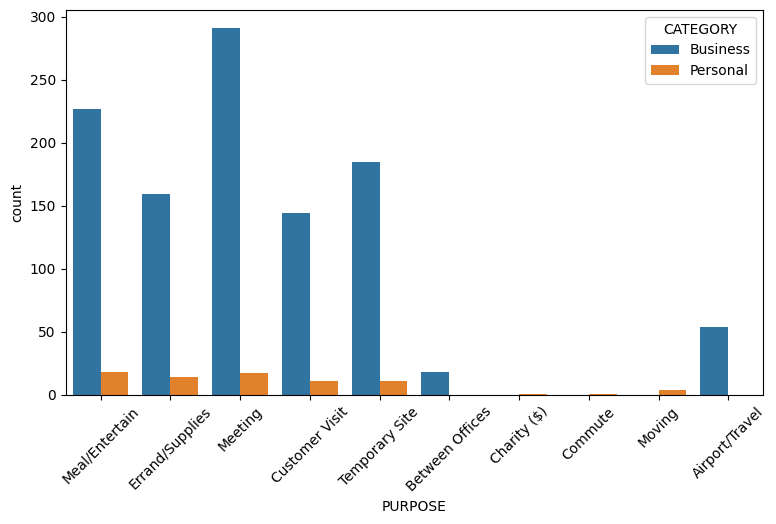

In [50]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY')
plt.xticks(rotation=45)

##### So majority of the trips are Business trips

### Lets check the frequency of cab rides start points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'Kenner'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'R?walpindi'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Edgehill Farms'),
  Text(20, 0, 'Central'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Orlando'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'Banner Elk')])

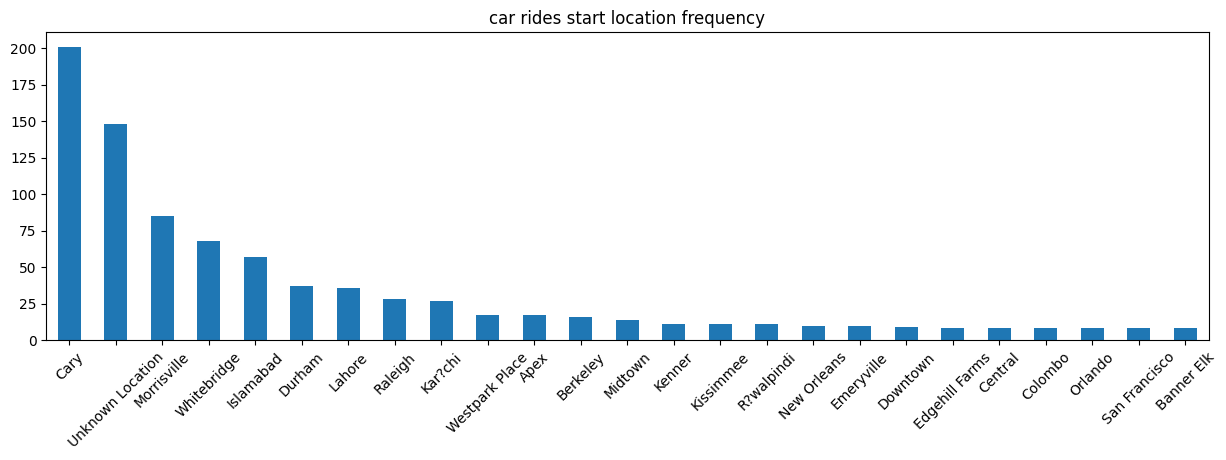

In [51]:
plt.figure(figsize=(15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('car rides start location frequency')
plt.xticks(rotation=45)

### Frequency of cab rides stop location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Berkeley'),
  Text(11, 0, 'Westpark Place'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Kenner'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Banner Elk'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Oakland'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'The Drag')])

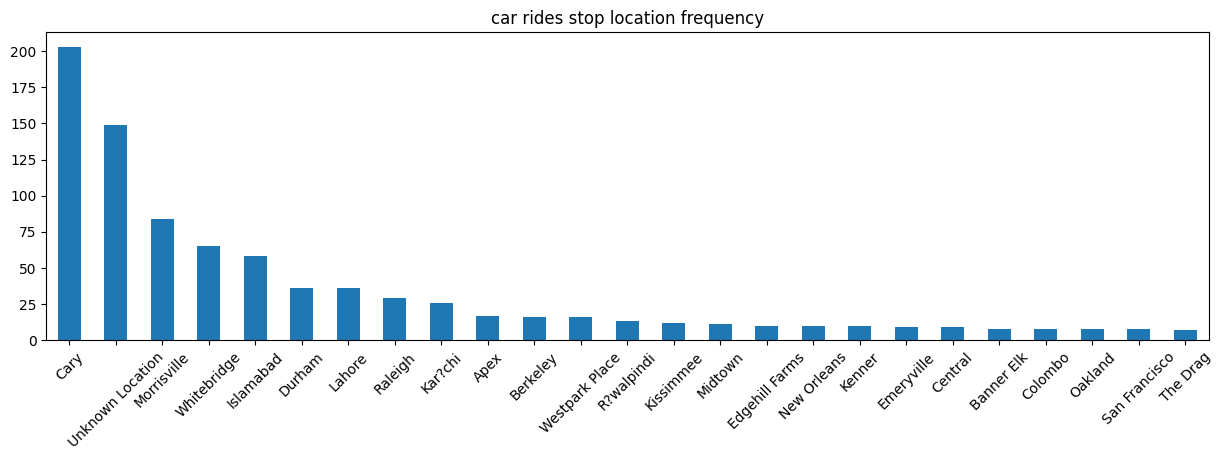

In [52]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title('car rides stop location frequency')
plt.xticks(rotation=45)

## CONCLUSIONS

#### 1. More rides in December
#### 2. Most round trips is in December
#### 3. Most are the trips are categorized in business category
#### 4. Frequennt start and stop location is cary.
#### 5. Seasonal pattern is there
#### 6. Majorly trips are not round trips
#### 7. Most of the cab rides are within the distance of 25 miles and usually taking 30 minutes.
#### 8. Most of the cab rides were booked  for the purpose of meetings and mean/entertainment.